### Clasificación basada en arboles / Proyecto 2-Parte I (Core)

## Proyecto 2-Parte I (Core)

**Proyecto 2: Análisis Inicial y Selección de Problema**

Objetivo: Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

# Descripción del Dataset: **Ventas de Productos**

Este conjunto de datos contiene información sobre las ventas de productos de una tienda, que incluye detalles sobre la transacción, el cliente, y las características de los productos comprados.

## Columnas del Dataset:

1. **Invoice ID**: Identificador único de la factura.
2. **Branch**: Sucursal donde se realizó la venta.
3. **City**: Ciudad donde se realizó la venta.
4. **Customer type**: Tipo de cliente (Miembro o Normal).
5. **Gender**: Género del cliente.
6. **Product line**: Categoría del producto (Ej. Salud y Belleza, Accesorios Electrónicos, etc.).
7. **Unit price**: Precio unitario del producto.
8. **Quantity**: Cantidad de productos comprados.
9. **Tax 5%**: Impuesto del 5% sobre el precio total.
10. **Sales**: Total de la venta (precio unitario * cantidad + impuestos).
11. **Date**: Fecha de la venta.
12. **Time**: Hora exacta de la venta.
13. **Payment**: Método de pago utilizado (Ej. Ewallet, Efectivo, Tarjeta de crédito).
14. **Cogs (Cost of Goods Sold)**: Costo de los productos vendidos.
15. **Gross margin percentage**: Porcentaje de margen bruto calculado a partir de la venta y el costo de los bienes vendidos.
16. **Gross income**: Ingreso bruto generado por la venta (Ventas - Costo de los productos vendidos).
17. **Rating**: Calificación dada por el cliente a la transacción.

## Ejemplo de Datos:

| Invoice ID   | Branch | City      | Customer type | Gender | Product line        | Unit price | Quantity | Tax 5%  | Sales  | Date       | Time           | Payment  | Cogs   | Gross margin percentage | Gross income | Rating |
|--------------|--------|-----------|---------------|--------|---------------------|------------|----------|---------|--------|------------|----------------|----------|--------|------------------------|--------------|--------|
| 750-67-8428  | Alex   | Yangon    | Member        | Female | Health and beauty    | 74.69      | 7        | 26.14   | 548.97 | 1/5/2019  | 1:08:00 PM     | Ewallet  | 522.83 | 4.76%                  | 26.14        | 9.1    |
| 226-31-3081  | Giza   | Naypyitaw | Normal        | Female | Electronic accessories | 15.28     | 5        | 3.82    | 80.22  | 3/8/2019  | 10:29:00 AM    | Cash     | 76.4   | 4.76%                  | 3.82         | 9.6    |
| 631-41-3108  | Alex   | Yangon    | Normal        | Female | Home and lifestyle   | 46.33      | 7        | 16.22   | 340.53 | 3/3/2019  | 1:23:00 PM     | Credit card | 324.31 | 4.76%                  | 16.22        | 7.4    |

## Propósito del Dataset:

Este dataset puede ser útil para realizar análisis de ventas y comportamiento del cliente. Se puede utilizar para:

- **Análisis de ventas**: Estudiar el rendimiento de las diferentes categorías de productos y las sucursales de la tienda.
- **Segmentación de clientes**: Identificar las características demográficas y de compra de los clientes (Ej. Género, Tipo de Cliente).
- **Análisis de márgenes**: Evaluar la rentabilidad de las ventas a través del margen bruto.
- **Optimización de precios**: Analizar el impacto del precio unitario y la cantidad vendida en las ventas totales.


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

In [2]:
path = '../datasets/SuperMarket Analysis.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Verificar estadísticas descriptivas para columnas numéricas
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Invoice ID,1000,0,0.0
Sales,1000,0,0.0
gross income,1000,0,0.0
gross margin percentage,1000,0,0.0
cogs,1000,0,0.0
Payment,1000,0,0.0
Time,1000,0,0.0
Date,1000,0,0.0
Tax 5%,1000,0,0.0
Branch,1000,0,0.0


In [6]:
# Verificar los tipos de datos de las columnas
print(df.dtypes)


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


**Identificación de Outliers**

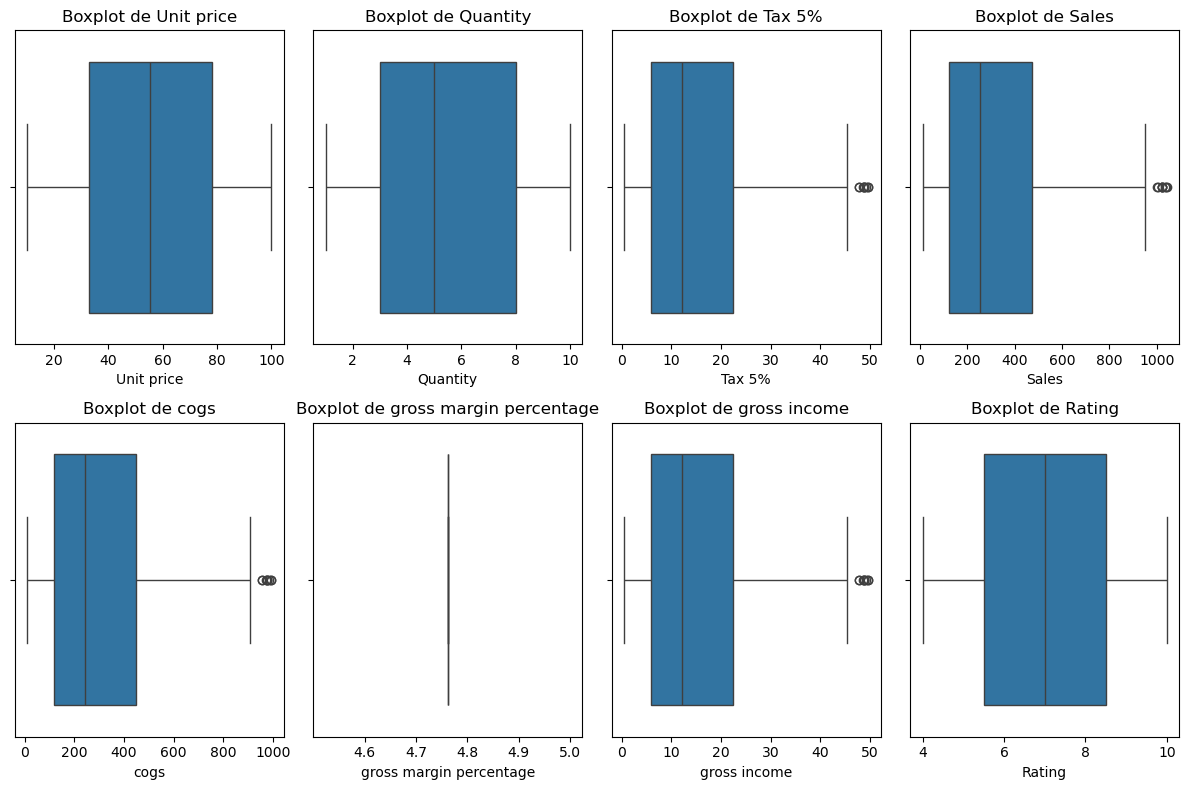

In [7]:
# Visualización de boxplots para detectar outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar boxplot para cada columna numérica
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()



**Distribución de Datos Categóricos**

In [8]:
# Contar valores únicos en las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Distribución de {col}:")
    print(df[col].value_counts())
    print("\n")


Distribución de Invoice ID:
Invoice ID
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64


Distribución de Branch:
Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64


Distribución de City:
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


Distribución de Customer type:
Customer type
Member    565
Normal    435
Name: count, dtype: int64


Distribución de Gender:
Gender
Female    571
Male      429
Name: count, dtype: int64


Distribución de Product line:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


Distribución de Date:
Date
2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     1

In [12]:
import pandas as pd

# Cargar tu dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Convertir 'Date' y 'Time' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Ajusta el formato si es necesario
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time  # Para convertir a solo hora

# Convertir columnas categóricas a tipo 'category' (más eficiente en memoria)
df['Invoice ID'] = df['Invoice ID'].astype('category')
df['Branch'] = df['Branch'].astype('category')
df['City'] = df['City'].astype('category')
df['Customer type'] = df['Customer type'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Product line'] = df['Product line'].astype('category')
df['Payment'] = df['Payment'].astype('category')

# Verificar los tipos de datos después de la conversión
print(df.dtypes)


Invoice ID                       category
Branch                           category
City                             category
Customer type                    category
Gender                           category
Product line                     category
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Sales                             float64
Date                       datetime64[ns]
Time                               object
Payment                          category
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


In [14]:
import pandas as pd

# Supongamos que df es tu DataFrame
# Primero, seleccionamos solo las columnas numéricas (int64 y float64)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Imputar NaN con la media de cada columna numérica
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())

# Verificar los cambios
print(df.isnull().sum())  # Verificar si quedan NaN en las columnas


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [16]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Invoice ID,1000,0,0.0
Sales,1000,0,0.0
gross income,1000,0,0.0
gross margin percentage,1000,0,0.0
cogs,1000,0,0.0
Payment,1000,0,0.0
Time,1000,0,0.0
Date,1000,0,0.0
Tax 5%,1000,0,0.0
Branch,1000,0,0.0


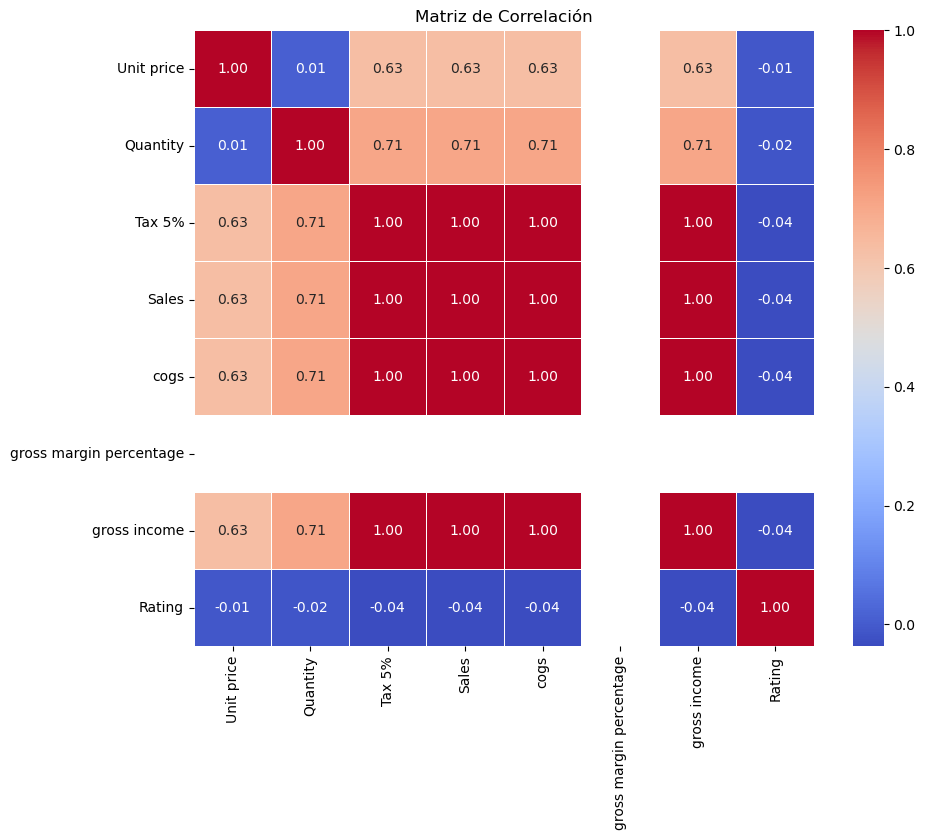

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [19]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [20]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Invoice ID,1000,0,0.0
Sales,1000,0,0.0
gross income,1000,0,0.0
gross margin percentage,1000,0,0.0
cogs,1000,0,0.0
Payment,1000,0,0.0
Time,1000,0,0.0
Date,1000,0,0.0
Tax 5%,1000,0,0.0
Branch,1000,0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   category      
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   category      
 3   Customer type            1000 non-null   category      
 4   Gender                   1000 non-null   category      
 5   Product line             1000 non-null   category      
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [22]:
# Ejemplo: asegurarse de que numerical_df contiene solo columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando el IQR para identificar outliers
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR

# Mostrar los outliers detectados
outliers = ((numerical_df < outlier_lower_bound) | (numerical_df > outlier_upper_bound))

# Contar el número de outliers por columna
outliers_count = outliers.sum()
print("\nNúmero de outliers por columna:")
print(outliers_count)

# (Opcional) Mostrar los registros con outliers si es necesario
print("\nRegistros que contienen outliers:")
print(numerical_df[outliers.any(axis=1)])



Número de outliers por columna:
Unit price                 0
Quantity                   0
Tax 5%                     9
Sales                      9
cogs                       9
gross margin percentage    0
gross income               9
Rating                     0
dtype: int64

Registros que contienen outliers:
     Unit price  Quantity  Tax 5%     Sales   cogs  gross margin percentage  \
166       95.58        10  47.790  1003.590  955.8                 4.761905   
167       98.98        10  49.490  1039.290  989.8                 4.761905   
350       99.30        10  49.650  1042.650  993.0                 4.761905   
357       95.44        10  47.720  1002.120  954.4                 4.761905   
422       97.21        10  48.605  1020.705  972.1                 4.761905   
557       98.52        10  49.260  1034.460  985.2                 4.761905   
699       97.50        10  48.750  1023.750  975.0                 4.761905   
792       97.37        10  48.685  1022.385  973.7     

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   category      
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   category      
 3   Customer type            1000 non-null   category      
 4   Gender                   1000 non-null   category      
 5   Product line             1000 non-null   category      
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [24]:
# Identificar las columnas categóricas (tipo 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas Categóricas:", categorical_columns)


Columnas Categóricas: Index(['Time'], dtype='object')


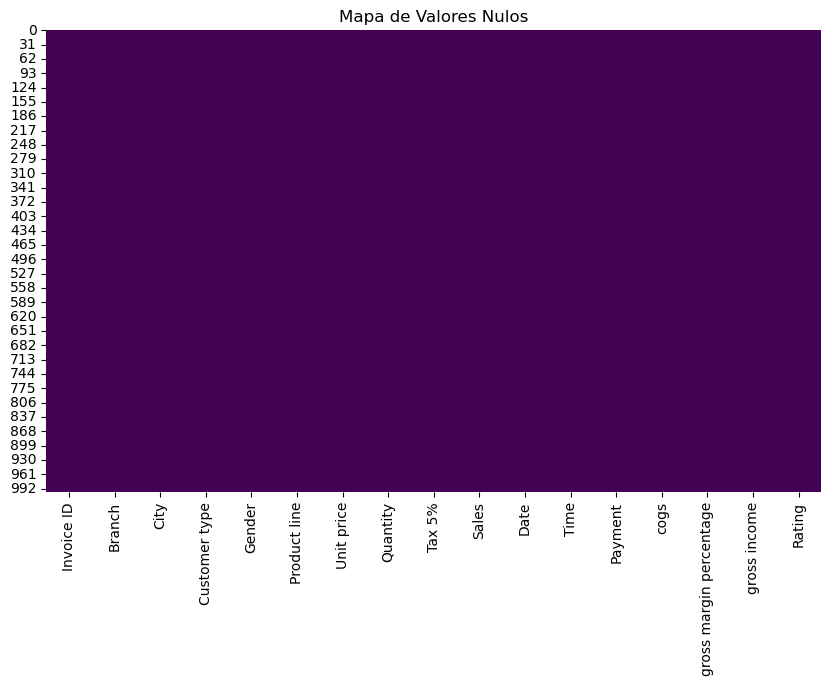

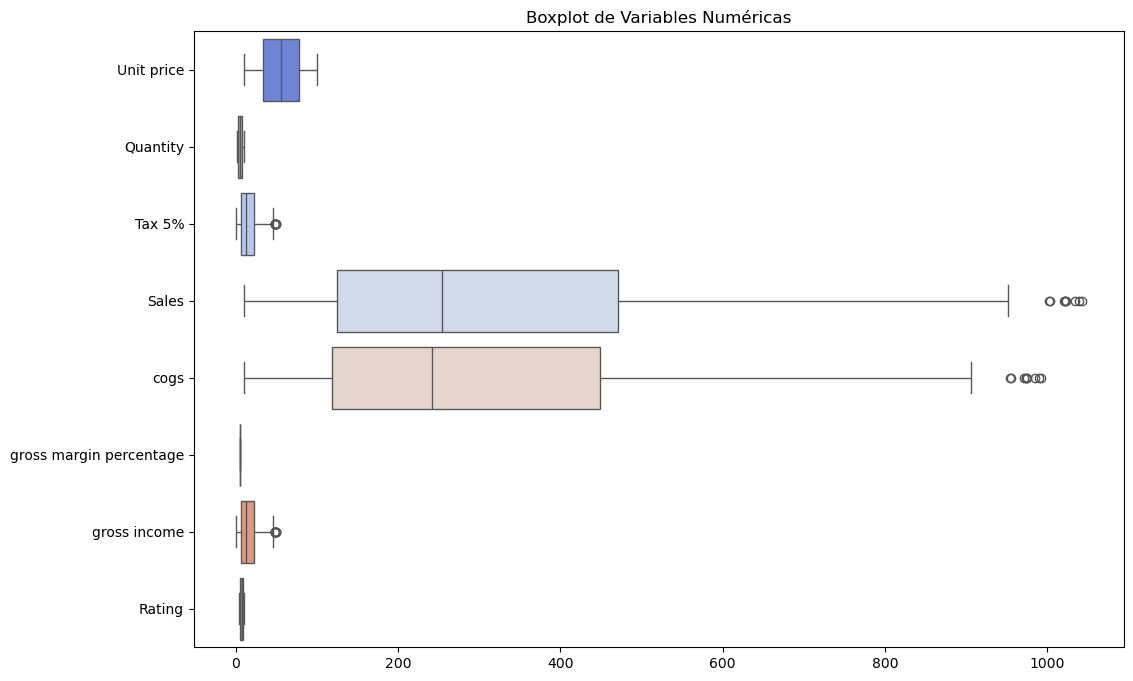

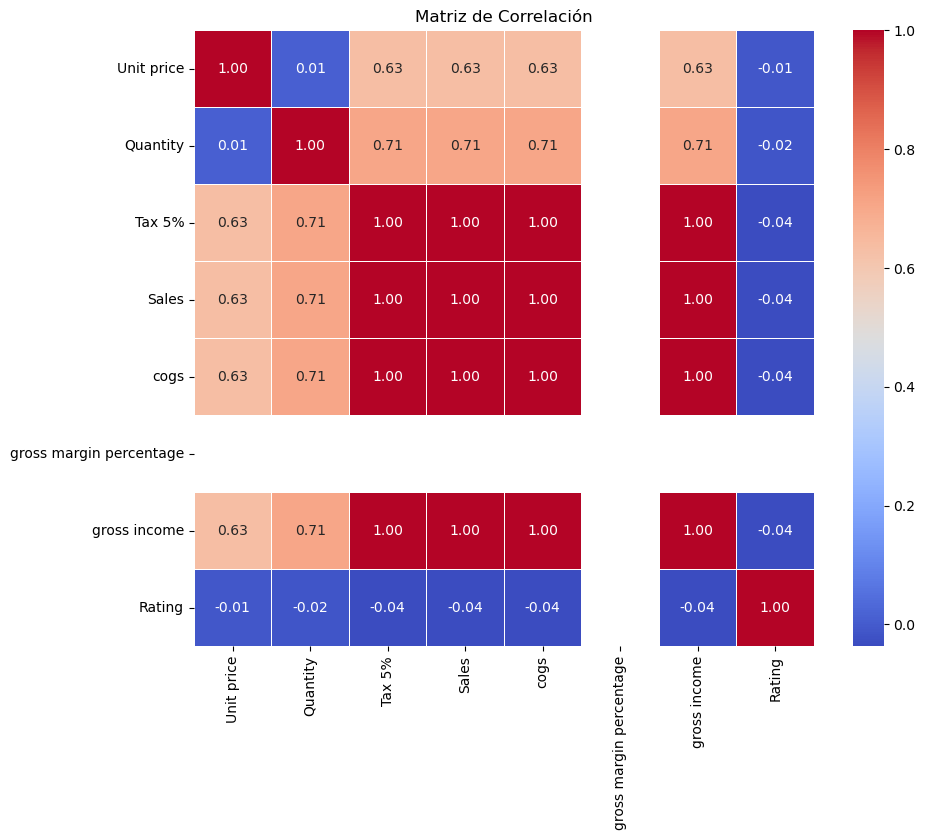

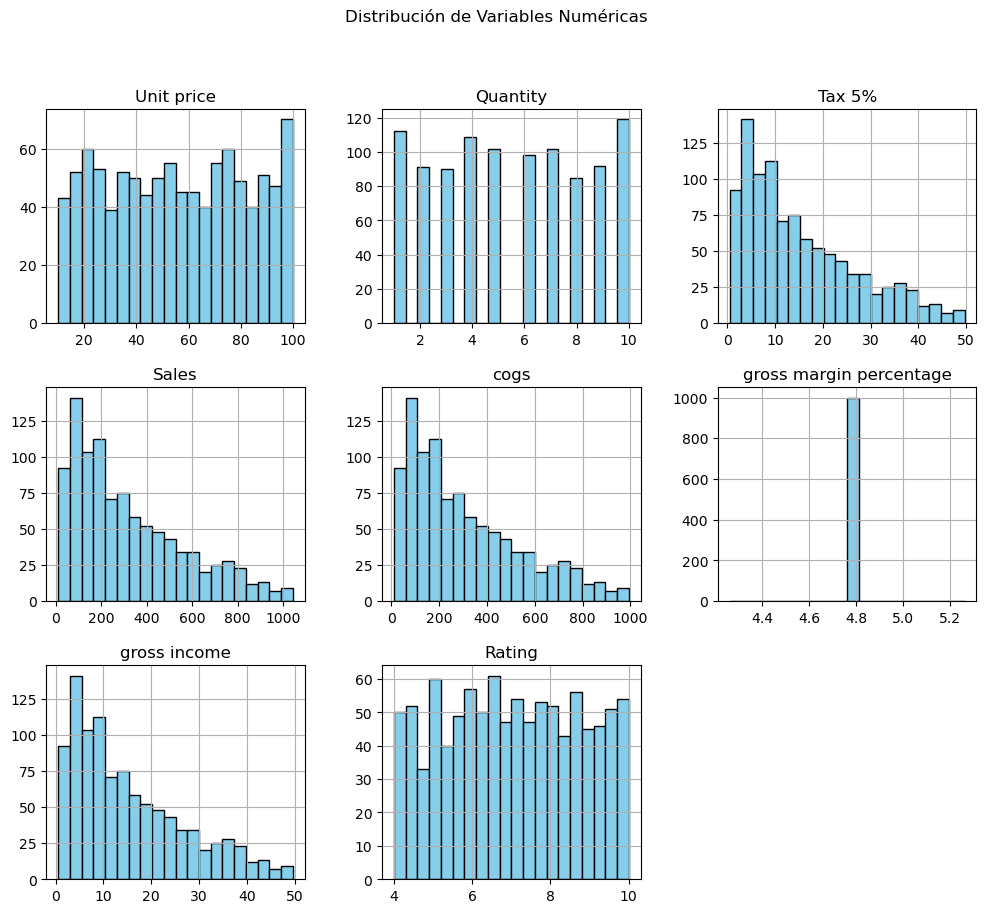

In [26]:
# Visualización de Valores Nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()

# Identificación de Outliers con Boxplot
# Para encontrar outliers, se crea un boxplot para las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_df, orient='h', palette='coolwarm')
plt.title('Boxplot de Variables Numéricas')
plt.show()

# Visualización de la Matriz de Correlación
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Distribución de Variables Numéricas
# Histograma para cada variable numérica
numerical_df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()
 

In [27]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [28]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [29]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Conclusiones del EDA
 

### **Diagnóstico y Selección de Problema:**

Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.

**1. Descripción General del DataFrame**

El conjunto de datos contiene 1000 registros, con columnas de tipo variado como numéricas (ventas, precios, cantidades) y categóricas (ciudad, tipo de cliente, género).

No hay valores faltantes en las columnas, lo cual es un punto positivo para el análisis.

**2. Estadísticas Descriptivas**

** *Unit Price:** El precio unitario de los productos varía entre 10.08 y 99.96, con una media de 55.67. Esto sugiere una gama de precios en el inventario, con algunos productos significativamente más baratos o más caros que otros.
* **Quantity:** Las cantidades vendidas van de 1 a 10 unidades, con un promedio de 5.51. Esto muestra que la mayoría de las transacciones involucran entre 5 y 6 productos.
* **Tax 5%:** El impuesto aplicado es directamente proporcional al precio y cantidad, con un rango de 0.51 a 49.65.
* **Sales:** Las ventas varían desde 10.68 hasta 1042.65, con un promedio de 322.97. Esto sugiere una distribución en la que algunas transacciones son más grandes que otras.
* **COGS (Cost of Goods Sold):** El costo de los productos vendidos tiene un rango que va de 10.17 a 993.00, con una media de 307.59, lo que es razonable considerando las ventas.
* **Gross Margin Percentage:** Este valor es constante en 4.76% en todas las transacciones, lo que indica que la empresa tiene un margen bruto fijo para sus productos.
* **Gross Income:** Varía entre 0.51 y 49.65, con un promedio de 15.38, lo que refleja las ganancias generadas por la venta después de restar el costo de los bienes vendidos.
* **Rating:** Las calificaciones de los clientes oscilan entre 4.0 y 10.0, con una media de 6.97, lo que sugiere que la mayoría de los clientes dejan una calificación positiva, pero hay espacio para mejorar.

**3. Distribución de Variables Categóricas**
* **Branch:** Hay varias sucursales, pero se requiere un análisis más profundo para ver cuál tiene el mayor volumen de ventas o productos.
* **City:** Se observa que algunas ciudades (como Yangon) tienen una mayor representación que otras.
* **Customer Type:** Se observa que la mayoría de los clientes son miembros, lo que podría indicar un programa de lealtad exitoso.
* **Gender:** La distribución por género es relativamente balanceada.
* **Product Line:** Se tiene una diversidad de líneas de productos, con una representación más destacada de algunas como Health and Beauty y Electronic Accessories.

**4. Correlaciones y Relaciones**
* **Unit price y Sales:** Como era de esperar, existe una correlación positiva entre el precio unitario y las ventas, ya que productos más caros tienden a generar ventas más altas.
* **Quantity y Sales:** La cantidad también muestra una correlación positiva con las ventas, ya que comprar más unidades incrementa el total de ventas.

**5. Outliers y Anomalías**
En las métricas como Sales, Unit price, y COGS, se puede observar que existen algunos outliers (valores extremos) en los extremos superiores de las distribuciones. Este comportamiento podría necesitar una revisión adicional o estar relacionado con transacciones excepcionales o errores en los datos.

**6. Tendencias Temporales**
* **Fecha y Hora:** Los registros incluyen un rango de fechas desde enero de 2019 hasta marzo de 2019. Un análisis temporal podría ayudar a identificar tendencias estacionales o patrones a lo largo del tiempo (por ejemplo, ventas más altas en ciertos días de la semana o meses).

**7. Conclusiones**

* El negocio parece tener una base sólida de clientes recurrentes (miembros), y las ventas son moderadamente distribuidas en términos de volumen de transacciones.
* Las ventas más altas generalmente están asociadas a precios unitarios más altos y cantidades más grandes.
* El margen bruto es constante, lo que puede indicar que el modelo de negocio es estable.
* Los productos más caros y las transacciones con mayores cantidades son más rentables, pero también pueden estar relacionadas con compras esporádicas o grandes.
* Los clientes tienen calificaciones positivas, lo que sugiere una satisfacción general con los productos y servicios.

## **Diagnóstico y Selección de Problema Basado en el EDA Inicial**

**1. Diagnóstico de Características y Desafíos del Conjunto de Datos**

El conjunto de datos que tenemos incluye tanto variables numéricas como categóricas. Después de realizar el EDA, se pueden identificar varias características clave y desafíos:

**Características Clave:**

**Variables Numéricas:**
* Sales, Unit Price, Quantity, COGS: Estas variables están directamente relacionadas con las transacciones y el rendimiento financiero de la empresa. Las relaciones entre ellas sugieren que el precio unitario y la cantidad influencian directamente las ventas.

* Gross Margin Percentage y Gross Income: Estas métricas reflejan la rentabilidad de cada transacción, que podría usarse para evaluar el impacto de diferentes características del producto o el cliente.

**Variables Categóricas:**
Branch, City, Customer Type, Gender, Product Line: Son importantes para segmentar a los clientes y analizar patrones de compra. Además, podrían ser útiles para predecir el comportamiento de compra de diferentes grupos de clientes.

* **Payment:** Este dato podría analizarse para ver la preferencia de métodos de pago y su relación con las ventas o las características de los productos.
* **Ratings:** La calificación de los clientes (de 4 a 10) refleja la satisfacción general y podría usarse para evaluar el impacto de ciertos factores sobre la satisfacción del cliente.

**Desafíos:**
* **Distribución de las Variables:** Las variables como Sales y Unit Price tienen un rango amplio, lo que puede generar outliers. Es importante revisar y tratar estos outliers para no afectar el modelo.
* **Relaciones No Lineales:** Algunas variables como Sales pueden no seguir una relación lineal simple con Unit Price o Quantity, lo que puede complicar algunos enfoques de modelado.
* **Satisfacción del Cliente (Rating):** Aunque la mayoría de los ratings están entre 4 y 10, las calificaciones más bajas podrían indicar problemas o insatisfacción, y puede haber correlaciones que valgan la pena explorar (por ejemplo, relación entre precios altos y calificación baja).


**2. Selección del Problema**

* **Problema Seleccionado:** Predicción de Ventas (Regresión)

**Justificación de la Elección:**

La predicción de ventas es una problemática clave para las empresas, ya que conocer las futuras ventas les permite planificar mejor la producción, gestión de inventarios y estrategia de marketing. Basado en el análisis de EDA, varios factores como el precio unitario, cantidad vendida, fecha de compra, cliente tipo, método de pago, etc., pueden influir en las ventas.

**Elementos que justifican la elección:**

* **Variables predictoras claras:** La existencia de variables como Unit price, Quantity, Tax 5%, Product line, y Branch sugiere que se pueden utilizar para predecir Sales. Estas variables tienen una relación directa con las ventas y la posibilidad de modelarlas mediante un enfoque de regresión es factible.
* **Desafíos en la predicción:** Aunque el conjunto de datos presenta algunas variables lineales y otras más complejas, la variabilidad en las ventas debido a diferentes tipos de clientes y productos hace que el problema sea desafiante y digno de ser modelado.
* **Importancia comercial:** Predecir las ventas con precisión puede ayudar a la empresa a optimizar sus recursos, gestionar la cadena de suministro y mejorar sus decisiones de marketing.

**Explicación de la Relevancia y Desafíos:**

* **Relevancia:** Las ventas son una de las métricas más cruciales para cualquier negocio. Ser capaz de predecir las ventas con precisión podría ofrecer una ventaja competitiva, permitiendo ajustes en tiempo real de la producción, inventarios y estrategia de precios.

* **Desafíos:** El desafío en este problema es la no linealidad en la relación entre algunas variables (por ejemplo, la interacción entre Quantity y Unit price), lo que podría hacer que el modelo sea más complejo de ajustar. Además, los outliers en los precios y las ventas pueden afectar la capacidad del modelo para predecir con precisión si no se tratan adecuadamente.

**Método Sugerido:** Dado que estamos tratando con un problema de predicción de una variable continua (Sales), el enfoque más adecuado es la regresión, pudiendo utilizar:

* **Regresión Lineal:** Para explorar relaciones simples.
* **Árboles de Decisión y Random Forest:** Para capturar interacciones complejas.
* **Modelos de Machine Learning (e.g., XGBoost):** Para abordar no linealidades y mejorar la precisión.

**Conclusión:**
El problema seleccionado de predicción de ventas es relevante tanto para la empresa como para los analistas de datos, ya que permite optimizar recursos y mejorar la toma de decisiones. Los desafíos, como la presencia de outliers y la no linealidad, hacen que el modelo sea interesante y desafiante, pero la gran cantidad de variables relevantes también ofrece oportunidades para aplicar técnicas avanzadas de modelado.

In [31]:
print(df.dtypes)

Invoice ID                       category
Branch                           category
City                                int32
Customer type                       int32
Gender                              int32
Product line                        int32
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Sales                             float64
Date                       datetime64[ns]
Time                               object
Payment                             int32
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


In [46]:
# Eliminar la columna 'Invoice ID'
df = df.drop(columns=['Invoice ID'])


**1. Visualización: Matriz de Confusión y Gráfica de Métricas**